In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.datasets import mnist

from neuralnet import *
from layers import *
from losses import *


In [2]:
imgres = 28 # Resolution of images
num_classes = 10
 
# Load in the training set and the test set and convert them into data matrices
# where each row is a different digit and a each column is a different pixel
# out of the 28x28 = 784 pixels
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.array(x_train, dtype=float)/255
x_test = np.array(x_test, dtype=float)/255
x_train = np.reshape(x_train, (x_train.shape[0], imgres**2))
x_test = np.reshape(x_test, (x_test.shape[0], imgres**2))
 
# Convert the training labels to 1-hot vectors
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
for i in range(20):
    print(y_test[i], end=" ")


(60000, 784)
(60000, 10)
(10000, 784)
(10000,)
7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 

In [4]:
# turn the probabilities into a 1 hot vector
def bake(a):
    b = np.zeros_like(a)
    b[np.argmax(a)] = 1
    return b

In [5]:
nn = NeuralNet(x_train.shape[1], softmax_est_crossentropy_deriv)
nn.add_layer(20, leaky_relu, leaky_relu_deriv)
nn.add_layer(10, softmax, None)

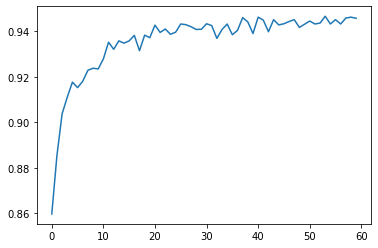

In [6]:
n_iters = 60
data = np.zeros(n_iters)

for n in range(n_iters):
    results = np.zeros_like(y_test)

    # train the network
    for k in np.random.permutation(x_train.shape[0]):
        nn.backprop_descent(x_train[k], y_train[k])

    # test the network
    for a, t in enumerate(x_test):
        probs = nn.forward(t)
        # success
        if np.argmax(probs) == y_test[a]:
            results[a] = 1
        # failure
        else:
            results[a] = 0

    data[n] = np.sum(results) / results.shape[0]

plt.plot(data)

In [7]:
nn2 = NeuralNet(x_train.shape[1], softmax_est_crossentropy_deriv)
nn2.add_layer(20, leaky_relu, leaky_relu_deriv)
nn2.add_layer(40, leaky_relu, leaky_relu_deriv)
nn2.add_layer(10, softmax, None)

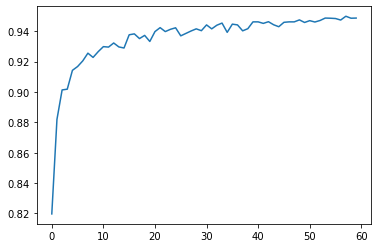

In [8]:
n_iters2 = 60
data2 = np.zeros(n_iters2)

for n in range(n_iters2):
    results = np.zeros_like(y_test)

    # train the network
    for k in np.random.permutation(x_train.shape[0]):
        nn2.backprop_descent(x_train[k], y_train[k])

    # test the network
    for a, t in enumerate(x_test):
        probs = nn2.forward(t)
        # success
        if np.argmax(probs) == y_test[a]:
            results[a] = 1
        # failure
        else:
            results[a] = 0

    data2[n] = np.sum(results) / results.shape[0]

plt.plot(data2)

It seems like the CNN with an extra layer becomes more accurate "faster" than the one that has less layers. It does run slower than the other one though. The reason for the speed decrease is because there is an extra layer of nodes to train and test. The reason for the faster convergence to a higher percent accuracy is thanks to the extra layer taking in what would have been the final output and learning from it before giving the new final output.